# Pima Indians Dibetes Prediction

##### Import Statements

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

##### Data Analysis

In [3]:
# Reading the csv file.
diabetes_db = pd.read_csv(r"Z:\Projects\Pima Indians Diabetes ML Model\data\diabetes.csv")

In [4]:
# Display the first five records of the csv file
diabetes_db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Check the shape to display the number of records and features
diabetes_db.shape

(768, 9)

In [6]:
# Generating a Statistical Analysis of the database
diabetes_db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# import visulization libraries
import matplotlib.pyplot as plt

In [10]:
label_counts = diabetes_db['Outcome'].value_counts()

In [11]:
plt.Figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Count of Outcome Labels')

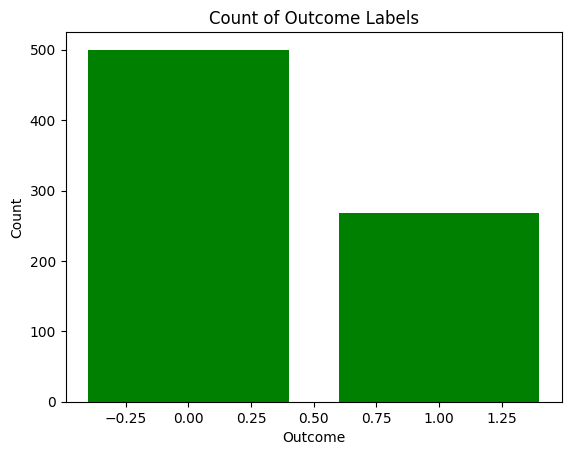

In [12]:
plt.bar(label_counts.index, label_counts.values, color='green')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Count of Outcome Labels')

In [13]:
label_counts

Outcome
0    500
1    268
Name: count, dtype: int64

###### What's happening here is that number of zeros is way more than the number of ones. This is a flaw in the dataset which needs to be taken care of else our model will become biased to choose zeros in outcome. This is known as Under Sample

In [14]:
df_class_0 = diabetes_db[diabetes_db['Outcome'] == 0]
df_class_1 = diabetes_db[diabetes_db['Outcome'] == 1]

In [15]:
# This basically extracts the length of the df_class_1 & makes df_class_0 of length same as df_class_1
df_class_0 = df_class_0.sample(len(df_class_1))

In [16]:
# Now we can go ahead merging the two datasets using pd.concat()
diabetes_db = pd.concat([df_class_0, df_class_1]) 

In [17]:
label_counts = diabetes_db['Outcome'].value_counts()

In [18]:
# We can now clearly see that their are equal number of zeros & ones through DA.
label_counts

Outcome
0    268
1    268
Name: count, dtype: int64

In [19]:
X = diabetes_db.drop(columns='Outcome', axis=1)

In [20]:
y = diabetes_db['Outcome']

In [21]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
362,5,103,108,37,0,39.2,0.305,65
624,2,108,64,0,0,30.8,0.158,21
160,4,151,90,38,0,29.7,0.294,36
380,1,107,72,30,82,30.8,0.821,24
596,0,67,76,0,0,45.3,0.194,46
...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37
757,0,123,72,0,0,36.3,0.258,52
759,6,190,92,0,0,35.5,0.278,66
761,9,170,74,31,0,44.0,0.403,43


In [23]:
y

362    0
624    0
160    0
380    0
596    0
      ..
755    1
757    1
759    1
761    1
766    1
Name: Outcome, Length: 536, dtype: int64

#### Model Building

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(536, 8) (428, 8) (108, 8)


In [31]:
print(y.shape, y_train.shape, y_test.shape)

(536,) (428,) (108,)


In [32]:
model = svm.SVC(kernel='linear')

In [33]:
model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


#### Model Evaluation

In [34]:
# Prediction and Evaluation for Training Set
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [35]:
print(f"Accuracy Score of the training data: {training_data_accuracy}")

Accuracy Score of the training data: 0.7453271028037384


In [37]:
# Prdiction and Evalutation for Testing Set
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [38]:
print(f"Accuracy Score of the testing data: {testing_data_accuracy}")

Accuracy Score of the testing data: 0.8148148148148148


##### Testing Predictions on random Inputs

In [48]:
inputs = (6, 148, 72, 35, 0, 33.6, 0.627, 50)

In [49]:
inputs = np.asarray(inputs)

In [50]:
inputs = inputs.reshape(1, -1)

In [51]:
prediction = model.predict(inputs)

z:\Projects\Pima Indians Diabetes ML Model\diabetes_venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [52]:
print(prediction)

[1]


In [53]:
if prediction[0] == 1:
    print("The person is Diabetic.")
else:
    print("The person is Non-diabetic.")

The person is Diabetic.


In [77]:
import pickle

In [78]:
filename = 'diabetes_model.pkl'

In [79]:
pickle.dump(model, open(filename, 'wb'))

In [80]:
from fastapi import FastAPI
from pydantic import BaseModel
import pickle 
import json 
import uvicorn
from pyngrok import ngrok
from fastapi.middleware.cors import CORSMiddleware
import nest_asyncio 

In [81]:
app = FastAPI()

In [82]:
origins = ['*']

In [83]:
app.add_middleware(
    CORSMiddleware,
    allow_origins=origins,
    allow_credentials=True,
    allow_methods=['*'],
    allow_headers=['*'],
)

In [84]:
class model_input(BaseModel):
    Pregnancies: int
    Glucose: int
    BloodPressure: int
    SkinThickness: int
    Insulin: int
    BMI: float
    DiabetesPedigreeFunction: float
    Age: int

In [88]:
from pathlib import Path
import os

print("cwd:", Path.cwd())
print("cwd (os.getcwd):", os.getcwd())
print("files in cwd (first 20):", [p.name for p in Path.cwd().iterdir()][:20])
print("diabetes_model.pkl exists:", Path("diabetes_model.pkl").exists())
print("src/diabetes_model.pkl exists:", Path("src/diabetes_model.pkl").exists())

cwd: z:\Projects\Pima Indians Diabetes ML Model\src
cwd (os.getcwd): z:\Projects\Pima Indians Diabetes ML Model\src
files in cwd (first 20): ['diabetes_model.pkl', 'diabetes_prediction.ipynb']
diabetes_model.pkl exists: True
src/diabetes_model.pkl exists: False


In [89]:
from pathlib import Path
p = Path("src/diabetes_model.pkl")
if not p.exists():
    p = Path("diabetes_model.pkl")   # fallback
assert p.exists(), f"Model file not found at {p}"
diabetes_model = pickle.load(open(p, "rb"))

In [92]:
@app.post("/prediction")
def diabetes_prediction(input_paras: model_input):
    
    # or JSON string:
    input_json = input_paras.model_dump_json()    # json string
    input_dictionary = json.loads(input_json)

    preg = input_dictionary.Pregnancies
    glucose = input_dictionary.Glucose
    bp = input_dictionary.BloodPressure
    st = input_dictionary.SkinThickness
    insulin = input_dictionary.Insulin
    bmi = input_dictionary.BMI
    dpf = input_dictionary.DiabetesPedigreeFunction
    age = input_dictionary.Age

    input_values = [preg, glucose, bp, st, insulin, bmi, dpf, age]
    input_values = np.asarray(input_values)
    input_values = input_values.reshape(1, -1)

    prediction = diabetes_model.predict(input_values)

    if (prediction[0] == 0):
        return "The Person is Diabetic"
    else:
        return "The Person is Non-diabetic"

In [93]:
!ngrok authtoken 32g8UQwGY48M9JC6wgdpB8JtZbF_57tp1khaXTeWxzMcPqPkb 

                                                                                                    
Installing ngrok ... 
                                                                                                    
Authtoken saved to configuration file: C:\Users\Asus\AppData\Local/ngrok/ngrok.yml


In [ ]:
from pyngrok import conf
ngrok.kill()
pyngrok_config = conf.get_default()
pyngrok_config.region = "us"

ngrok_tunnel = ngrok.connect(8000, pyngrok_config=pyngrok_config)
print(f"Tunnel URL: {ngrok_tunnel.public_url}")

Tunnel URL: https://a1ca0e351603.ngrok-free.app


t=2025-09-14T13:44:51+0530 lvl=warn msg="failed to open private leg" id=7a27328077c3 privaddr=localhost:8000 err="dial tcp [::1]:8000: connectex: No connection could be made because the target machine actively refused it."
t=2025-09-14T13:54:11+0530 lvl=warn msg="failed to open private leg" id=46b62b98e033 privaddr=localhost:8000 err="dial tcp [::1]:8000: connectex: No connection could be made because the target machine actively refused it."
t=2025-09-14T13:56:03+0530 lvl=warn msg="failed to open private leg" id=331b0dff1066 privaddr=localhost:8000 err="dial tcp [::1]:8000: connectex: No connection could be made because the target machine actively refused it."
t=2025-09-14T13:56:21+0530 lvl=warn msg="failed to open private leg" id=b6c969bc4321 privaddr=localhost:8000 err="dial tcp [::1]:8000: connectex: No connection could be made because the target machine actively refused it."
t=2025-09-14T13:59:30+0530 lvl=warn msg="failed to open private leg" id=d93a8bdb3a7a privaddr=localhost:8000